Dataset caricato con successo!
Numero di record: 1061
Anni: 2015 - 2023
Range valori: 0.00 - 14.90


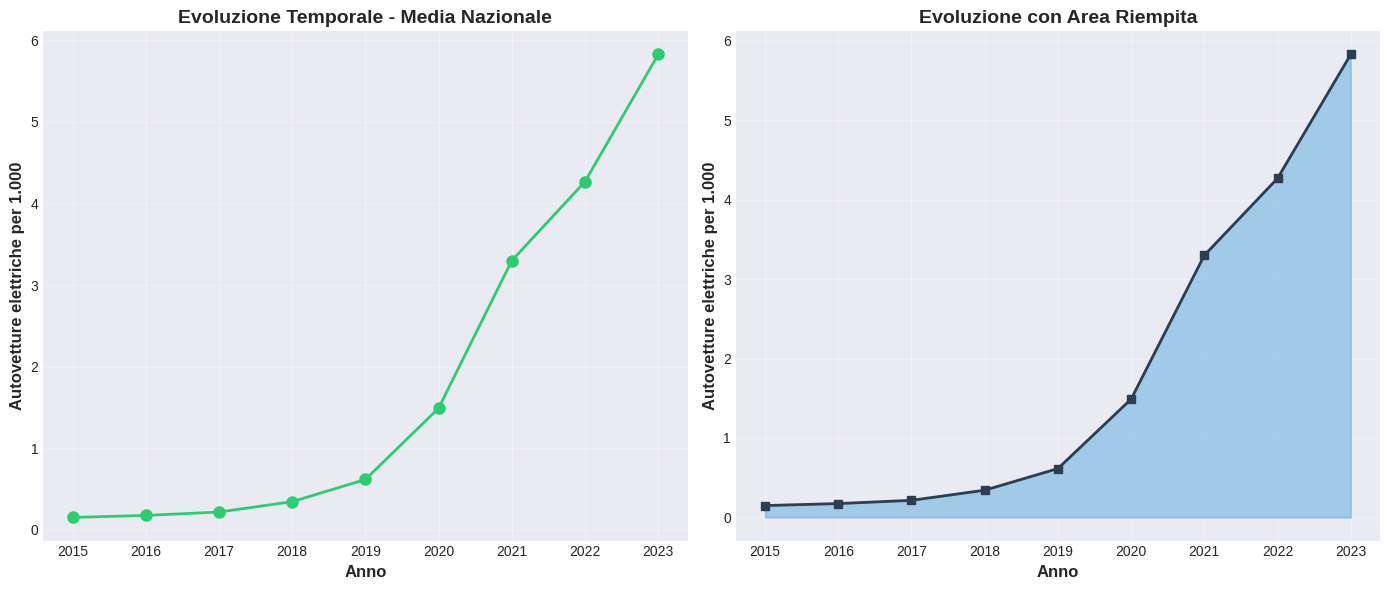

In [1]:
# ============================================================================
# SCRIPT JUPYTER NOTEBOOK - ANALISI AUTOVETTURE ELETTRICHE IN ITALIA
# Visualizzazione di diversi tipi di grafici
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurazione stile grafici
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# ============================================================================
# 1. CARICAMENTO E PREPARAZIONE DATI
# ============================================================================

# Carica il file CSV
df = pd.read_csv('/home/matteo/Documents/data_visualization/data/csv/auto_elettr._su_1000(piu_dati).csv')


df_clean = df.reset_index(drop=True)

# Estrai anno e valore numerico
df_clean['Anno'] = df_clean['DATA_TYPE']
df_clean['Valore'] = pd.to_numeric(df_clean['Indicatore'], errors='coerce')

# Rimuovi valori nulli
df_clean = df_clean.dropna(subset=['Valore'])

# Estrai il codice del territorio (colonna Territorio contiene descrizioni)
df_clean['Territorio_Code'] = df_clean['Territorio'].str.extract(r'IT([A-Z0-9]+)')

print("Dataset caricato con successo!")
print(f"Numero di record: {len(df_clean)}")
print(f"Anni: {df_clean['Anno'].min()} - {df_clean['Anno'].max()}")
print(f"Range valori: {df_clean['Valore'].min():.2f} - {df_clean['Valore'].max():.2f}")

# ============================================================================
# 2. GRAFICO A LINEE - Evoluzione temporale media nazionale
# ============================================================================

plt.figure(figsize=(14, 6))

# Calcola la media per anno
media_per_anno = df_clean.groupby('Anno')['Valore'].mean().reset_index()

plt.subplot(1, 2, 1)
plt.plot(media_per_anno['Anno'], media_per_anno['Valore'], 
         marker='o', linewidth=2, markersize=8, color='#2ecc71')
plt.xlabel('Anno', fontsize=12, fontweight='bold')
plt.ylabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.title('Evoluzione Temporale - Media Nazionale', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(media_per_anno['Anno'])

# Con area riempita
plt.subplot(1, 2, 2)
plt.fill_between(media_per_anno['Anno'], media_per_anno['Valore'], 
                 alpha=0.4, color='#3498db')
plt.plot(media_per_anno['Anno'], media_per_anno['Valore'], 
         marker='s', linewidth=2, markersize=6, color='#2c3e50')
plt.xlabel('Anno', fontsize=12, fontweight='bold')
plt.ylabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.title('Evoluzione con Area Riempita', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(media_per_anno['Anno'])

plt.tight_layout()
plt.savefig('grafico_linee_evoluzione.png', dpi=300, bbox_inches='tight')
plt.show()

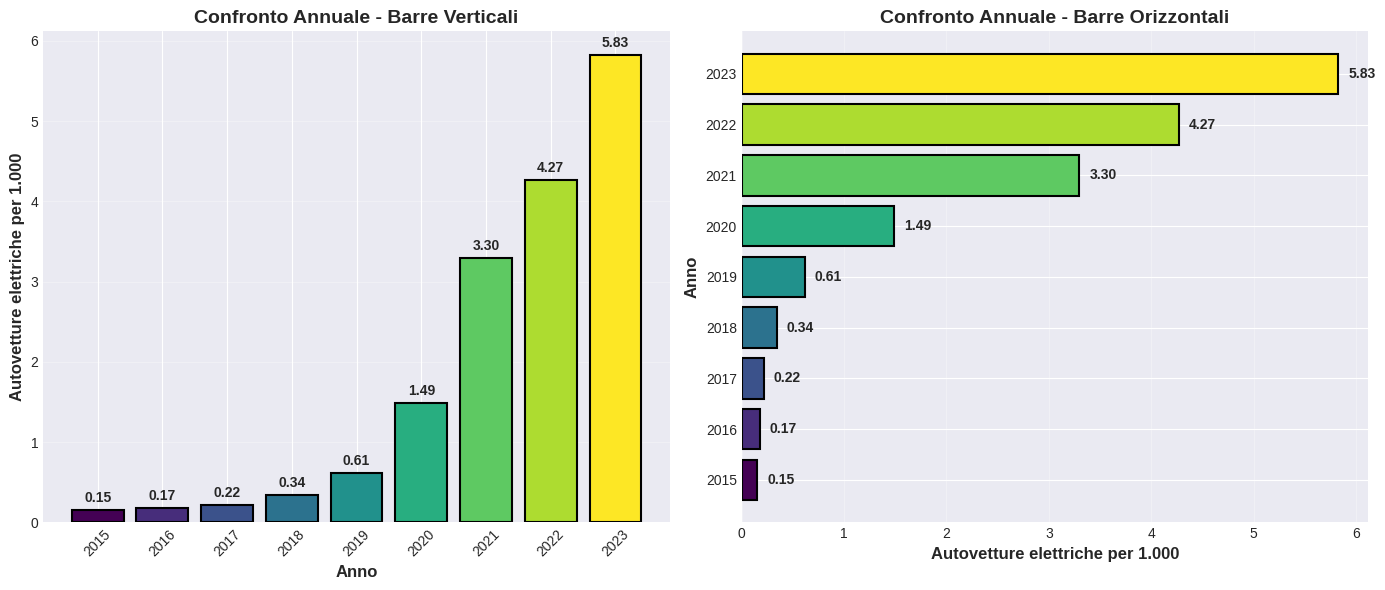

In [2]:
# ============================================================================
# 3. GRAFICO A BARRE - Confronto tra anni
# ============================================================================

plt.figure(figsize=(14, 6))

# Barre verticali
plt.subplot(1, 2, 1)
colors = plt.cm.viridis(np.linspace(0, 1, len(media_per_anno)))
plt.bar(media_per_anno['Anno'].astype(str), media_per_anno['Valore'], 
        color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Anno', fontsize=12, fontweight='bold')
plt.ylabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.title('Confronto Annuale - Barre Verticali', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Aggiungi valori sopra le barre
for i, v in enumerate(media_per_anno['Valore']):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

# Barre orizzontali
plt.subplot(1, 2, 2)
plt.barh(media_per_anno['Anno'].astype(str), media_per_anno['Valore'], 
         color=colors, edgecolor='black', linewidth=1.5)
plt.ylabel('Anno', fontsize=12, fontweight='bold')
plt.xlabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.title('Confronto Annuale - Barre Orizzontali', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Aggiungi valori alla fine delle barre
for i, v in enumerate(media_per_anno['Valore']):
    plt.text(v + 0.1, i, f'{v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('grafico_barre_confronto.png', dpi=300, bbox_inches='tight')
plt.show()



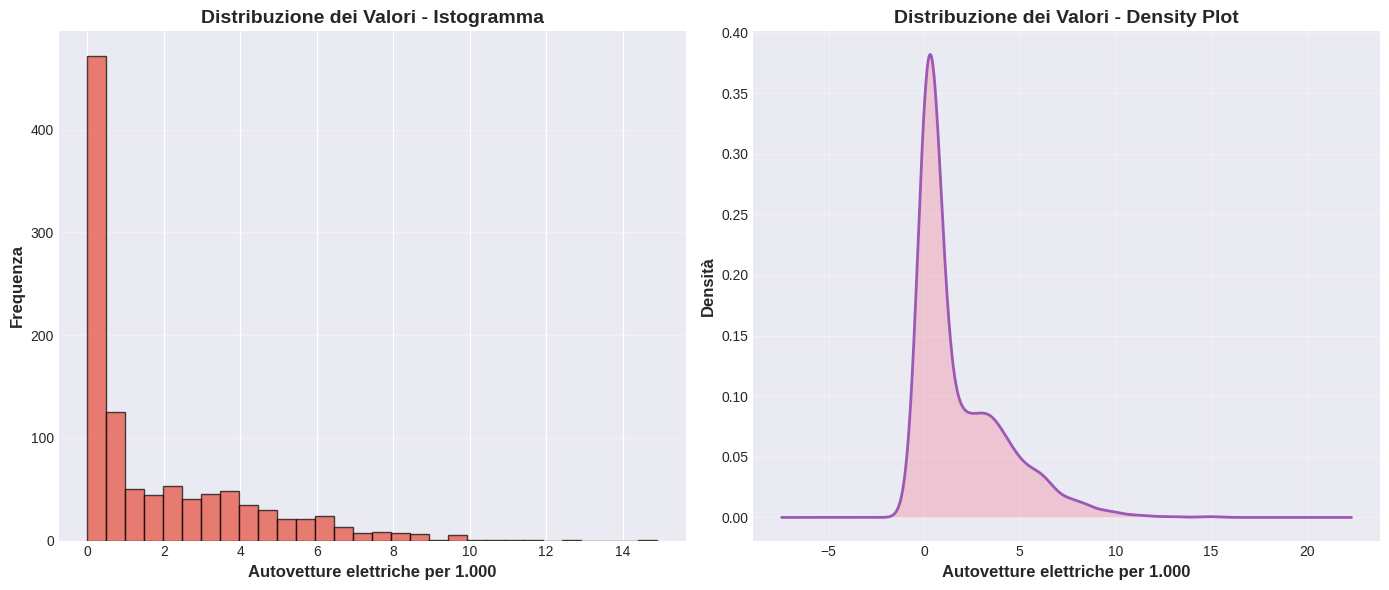

In [3]:
# ============================================================================
# 4. ISTOGRAMMA E DISTRIBUZIONE - Distribuzione dei valori
# ============================================================================

plt.figure(figsize=(14, 6))

# Istogramma
plt.subplot(1, 2, 1)
plt.hist(df_clean['Valore'], bins=30, color='#e74c3c', 
         edgecolor='black', alpha=0.7)
plt.xlabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.ylabel('Frequenza', fontsize=12, fontweight='bold')
plt.title('Distribuzione dei Valori - Istogramma', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Density plot (KDE)
plt.subplot(1, 2, 2)
df_clean['Valore'].plot(kind='density', linewidth=2, color='#9b59b6')
plt.xlabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.ylabel('Densità', fontsize=12, fontweight='bold')
plt.title('Distribuzione dei Valori - Density Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.fill_between(plt.gca().get_lines()[0].get_xdata(), 
                 plt.gca().get_lines()[0].get_ydata(), alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_distribuzione.png', dpi=300, bbox_inches='tight')
plt.show()



/tmp/ipykernel_18114/4158318967.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Anno', y='Valore', palette='muted')


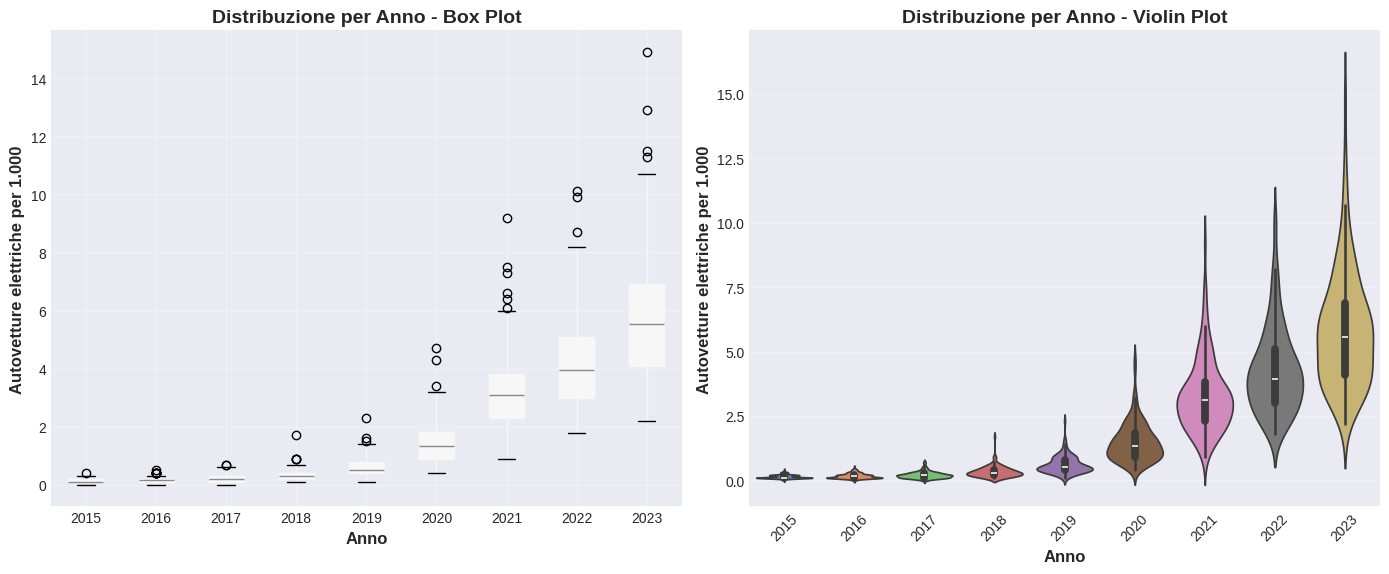

In [4]:
# ============================================================================
# 5. BOX PLOT E VIOLIN PLOT - Distribuzione per anno
# ============================================================================

plt.figure(figsize=(14, 6))

# Box plot
plt.subplot(1, 2, 1)
df_clean.boxplot(column='Valore', by='Anno', ax=plt.gca(), 
                 patch_artist=True, grid=False)
plt.xlabel('Anno', fontsize=12, fontweight='bold')
plt.ylabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.title('Distribuzione per Anno - Box Plot', fontsize=14, fontweight='bold')
plt.suptitle('')  # Rimuovi il titolo automatico
plt.grid(True, alpha=0.3)

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, x='Anno', y='Valore', palette='muted')
plt.xlabel('Anno', fontsize=12, fontweight='bold')
plt.ylabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.title('Distribuzione per Anno - Violin Plot', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_boxplot_violin.png', dpi=300, bbox_inches='tight')
plt.show()



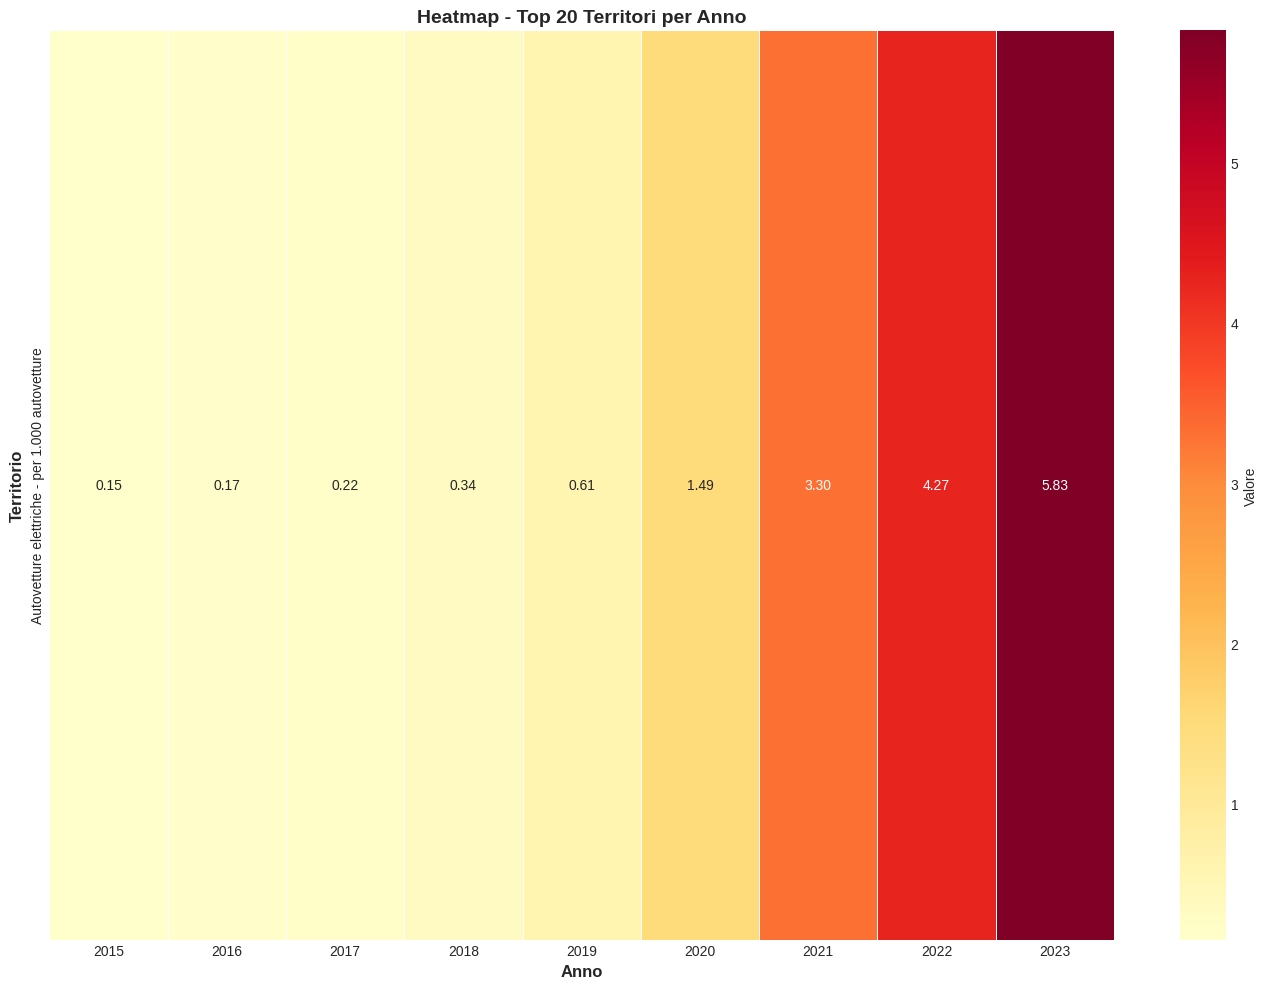

In [5]:
# ============================================================================
# 7. HEATMAP - Matrice di correlazione e valori per territorio/anno
# ============================================================================

# Crea una pivot table per l'heatmap (primi 20 territori)
top_territori = df_clean.groupby('Territorio')['Valore'].mean().nlargest(20).index
df_heatmap = df_clean[df_clean['Territorio'].isin(top_territori)]
pivot_data = df_heatmap.pivot_table(values='Valore', 
                                     index='Territorio', 
                                     columns='Anno', 
                                     aggfunc='mean')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', 
           linewidths=0.5, cbar_kws={'label': 'Valore'})
plt.xlabel('Anno', fontsize=12, fontweight='bold')
plt.ylabel('Territorio', fontsize=12, fontweight='bold')
plt.title('Heatmap - Top 20 Territori per Anno', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('grafico_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()



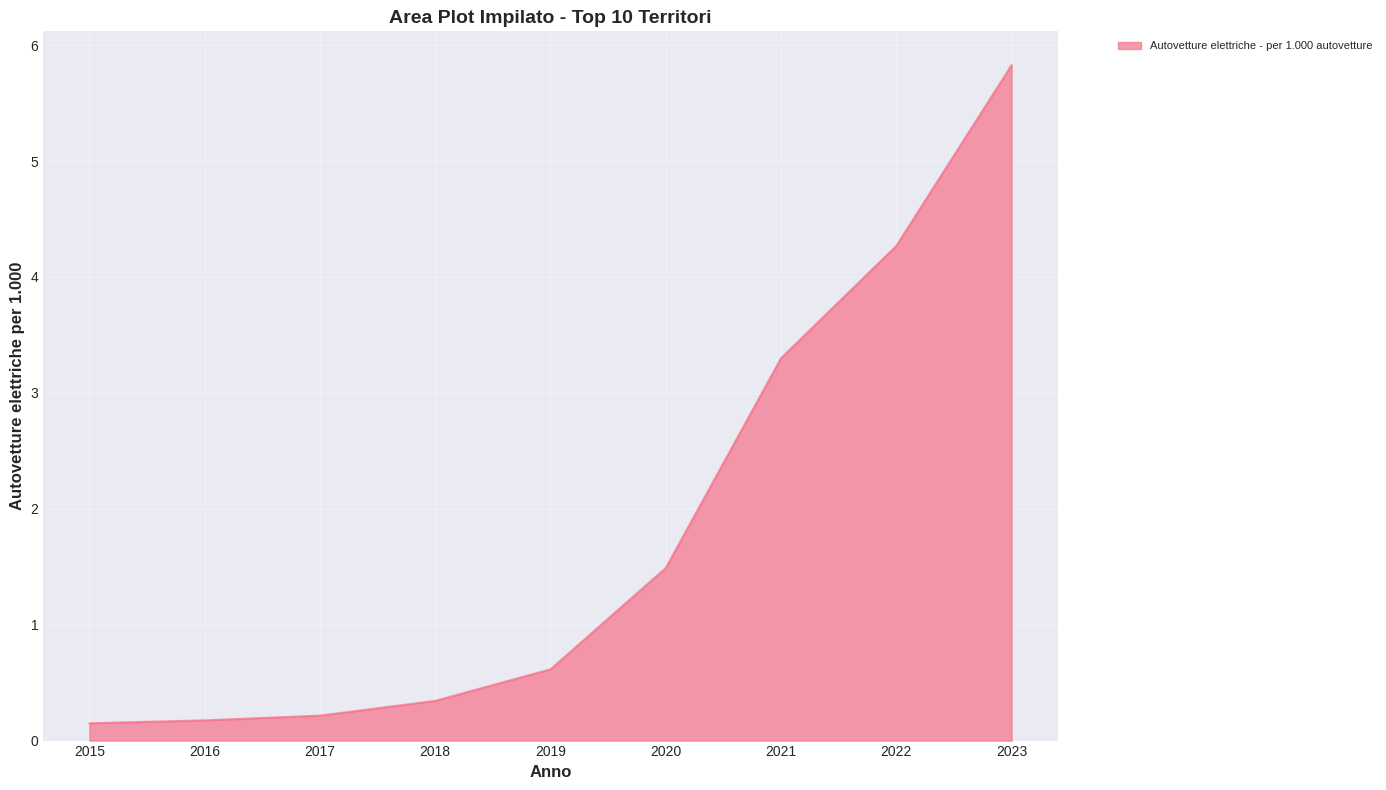

In [6]:
# ============================================================================
# 8. AREA PLOT IMPILATO - Evoluzione cumulativa
# ============================================================================

# Seleziona i top 10 territori per visualizzazione
top10_territori = df_clean.groupby('Territorio')['Valore'].mean().nlargest(10).index
df_top10 = df_clean[df_clean['Territorio'].isin(top10_territori)]

# Crea pivot per area plot
pivot_area = df_top10.pivot_table(values='Valore', 
                                  index='Anno', 
                                  columns='Territorio', 
                                  aggfunc='mean')

plt.figure(figsize=(14, 8))
pivot_area.plot(kind='area', stacked=True, alpha=0.7, ax=plt.gca())
plt.xlabel('Anno', fontsize=12, fontweight='bold')
plt.ylabel('Autovetture elettriche per 1.000', fontsize=12, fontweight='bold')
plt.title('Area Plot Impilato - Top 10 Territori', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('grafico_area_impilato.png', dpi=300, bbox_inches='tight')
plt.show()



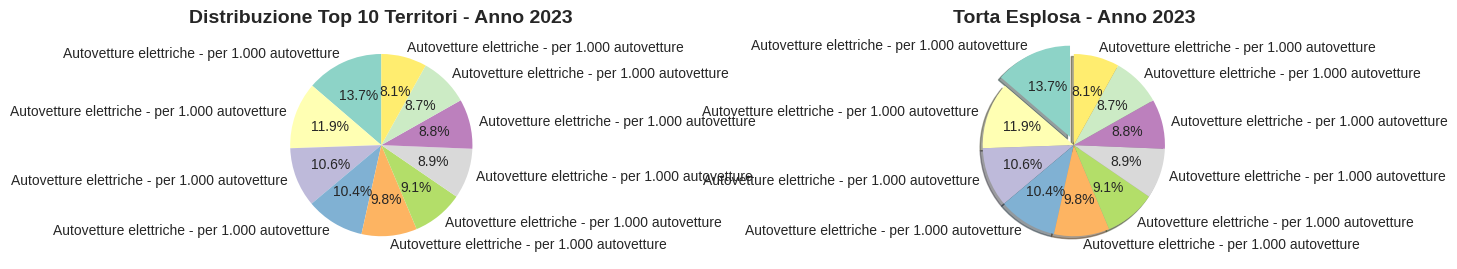

In [7]:
# ============================================================================
# 9. GRAFICO A TORTA - Distribuzione per anno (ultimo anno)
# ============================================================================

# Prendi l'ultimo anno disponibile
ultimo_anno = df_clean['Anno'].max()
df_ultimo_anno = df_clean[df_clean['Anno'] == ultimo_anno]

# Top 10 territori per l'ultimo anno
top10_ultimo = df_ultimo_anno.nlargest(10, 'Valore')

plt.figure(figsize=(14, 6))

# Torta standard
plt.subplot(1, 2, 1)
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(top10_ultimo)))
plt.pie(top10_ultimo['Valore'], labels=top10_ultimo['Territorio'], 
        autopct='%1.1f%%', startangle=90, colors=colors_pie)
plt.title(f'Distribuzione Top 10 Territori - Anno {ultimo_anno}', 
         fontsize=14, fontweight='bold')

# Torta esplosa
plt.subplot(1, 2, 2)
explode = [0.1] + [0] * (len(top10_ultimo) - 1)  # Esplodi la prima fetta
plt.pie(top10_ultimo['Valore'], labels=top10_ultimo['Territorio'], 
        autopct='%1.1f%%', startangle=90, colors=colors_pie, 
        explode=explode, shadow=True)
plt.title(f'Torta Esplosa - Anno {ultimo_anno}', 
         fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('grafico_torta.png', dpi=300, bbox_inches='tight')
plt.show()



In [8]:
# ============================================================================
# 10. STATISTICHE RIASSUNTIVE E TABELLA
# ============================================================================

print("\n" + "="*80)
print("STATISTICHE RIASSUNTIVE")
print("="*80)

# Statistiche per anno
stats_per_anno = df_clean.groupby('Anno')['Valore'].agg([
    ('Media', 'mean'),
    ('Mediana', 'median'),
    ('Minimo', 'min'),
    ('Massimo', 'max'),
    ('Deviazione Standard', 'std')
]).round(2)

print("\nStatistiche per Anno:")
print(stats_per_anno)

# Top 10 territori con valori più alti
print("\n" + "="*80)
print("TOP 10 TERRITORI (Media)")
print("="*80)
top10_media = df_clean.groupby('Territorio')['Valore'].mean().nlargest(10).round(2)
print(top10_media)

# Salva le statistiche in CSV
stats_per_anno.to_csv('statistiche_per_anno.csv')
top10_media.to_csv('top10_territori.csv')

print("\n" + "="*80)
print("ANALISI COMPLETATA!")
print("="*80)
print("Grafici salvati:")
print("  1. grafico_linee_evoluzione.png")
print("  2. grafico_barre_confronto.png")
print("  3. grafico_distribuzione.png")
print("  4. grafico_boxplot_violin.png")
print("  5. grafico_scatter.png")
print("  6. grafico_heatmap.png")
print("  7. grafico_area_impilato.png")
print("  8. grafico_torta.png")
print("\nFile CSV salvati:")
print("  - statistiche_per_anno.csv")
print("  - top10_territori.csv")



STATISTICHE RIASSUNTIVE

Statistiche per Anno:
      Media  Mediana  Minimo  Massimo  Deviazione Standard
Anno                                                      
2015   0.15     0.10     0.0      0.4                 0.07
2016   0.17     0.15     0.0      0.5                 0.10
2017   0.22     0.20     0.0      0.7                 0.13
2018   0.34     0.30     0.1      1.7                 0.21
2019   0.62     0.50     0.1      2.3                 0.33
2020   1.49     1.35     0.4      4.7                 0.74
2021   3.30     3.10     0.9      9.2                 1.40
2022   4.27     3.95     1.8     10.1                 1.67
2023   5.83     5.55     2.2     14.9                 2.25

TOP 10 TERRITORI (Media)
Territorio
Autovetture elettriche - per 1.000 autovetture    1.85
Name: Valore, dtype: float64

ANALISI COMPLETATA!
Grafici salvati:
  1. grafico_linee_evoluzione.png
  2. grafico_barre_confronto.png
  3. grafico_distribuzione.png
  4. grafico_boxplot_violin.png
  5. grafico_s